# Name: Suhas V S

**Task 1:** Implementation of a simple linear regression

## Problem Statement

Predict the percentage of an student based on the no. of study hours

## Feature Description

1. **Hours:** Number of hours student has studied in a day.(Independent Variable)
2. **Scores:** Percentage of marks obtained by the student corresponding to the number of study hours.(Target Variable)

## Work flow

1. Understanding the data
2. Building a model
3. Evaluationg the model
4. Predicting the score if a student studies for 9.25 hrs/ day?

In [7]:
# Import the basic libraries for data manupulation and visualization

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Understanding the data

In [8]:
# Reading the dataset and checking for the fisrt 5 records
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Preliminary check

In [9]:
# Shape of the data

df.shape

(25, 2)

**The dataset has records of 25 students and their scores correspondong to their number of study hours.**

In [10]:
# Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Variable "Hours" is of the "float" datatype and "Scores" is of the "int" datatype. There is no mistake in the datatype of the variables when compared to the probelm statement.**

**The target variable is a number and continous in nature. The first assumption of the Linear regression is satified**

In [12]:
# Statistical Summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**The describe function gives information about the statistical measures such as mean, standard deviation, values for the different quartile ranges for both the features.**

**Maximum hours** that a student has studied is **9.2 hrs**.<br>
**Minimum hours** that a student has studied is **1.1 hrs**.<br>
**Maximum marks** obtained by any student is **95**.<br>
**Minimum marks** obtained by any student is **17**.

In [67]:
# Let us see the marks obtained for the student with 9.2/1.1 hours of study

# Maximum hours of study 9.2 hrs

df[df.Hours==9.2]

,Hours,Scores
6,9.2,88


**Since the maximum marks is 95, the student who has studied for the highest number of hours is not the topper.**

In [69]:
# Minimum hours of study1.1 hrs

df[df.Hours==1.1]

,Hours,Scores
14,1.1,17


**The student who has studied for the least number of hours is the one with the lowest score.**

In [70]:
# Let us the number of hours that the topper has put in.

df[df.Scores==df.Scores.max()]

,Hours,Scores
15,8.9,95


**The student with the highest marks of 95 has put in 8.9 hours of study time which is 0.3 hours less than the student who has put in the highest number of study hours(9.2 hours)**.

### Missing/duplicate data check

In [13]:
# Checking for the Standard missing values

df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [21]:
# Checking for non-standard missing values for any characters like #,%,?.......

for i in df.columns:
    print("Unique values for the column:",i)
    print(np.unique(df[i]))

Unique values for the column: Hours
[1.1 1.5 1.9 2.5 2.7 3.2 3.3 3.5 3.8 4.5 4.8 5.1 5.5 5.9 6.1 6.9 7.4 7.7
 7.8 8.3 8.5 8.9 9.2]
Unique values for the column: Scores
[17 20 21 24 25 27 30 35 41 42 47 54 60 62 67 69 75 76 81 85 86 88 95]


**From the output of the above 2 cells, there are no missing values of any kind(standard/non-standard) in the given dataset.**

In [63]:
# Check for duplicate entries

len(df[df.duplicated()])

0

**There are no duplicate records in the dataset.**

### Distribution Check

Skew value for the columns:
Hours     0.190338
Scores    0.233965
dtype: float64


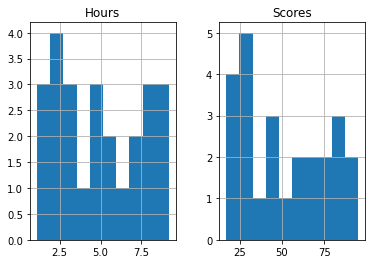

In [30]:
# Distribution Check

print("Skew value for the columns:")
print(df.skew())

df.hist()
plt.show()

**From the above histogram plot, we see both the variables are normally distributed and their skew values are closer to 0.**

### Outlier Check

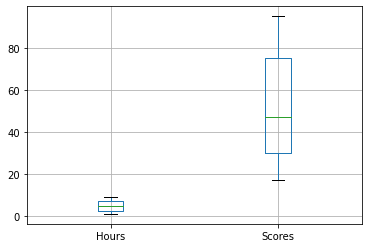

In [33]:
# Outlier Check using boxplot

df.boxplot()
plt.show()

**There are no outliers in any of the columns.**

### Checking for realationship between target and independent variable.

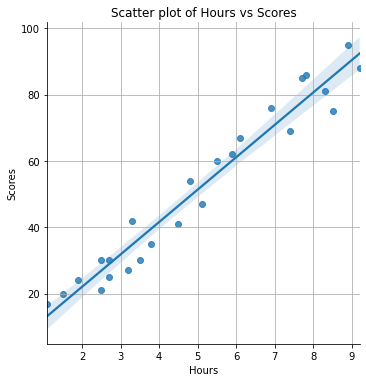

In [58]:
#1. lmplot Plot

sns.lmplot(x="Hours",y="Scores",data=df)
plt.title("Scatter plot of Hours vs Scores")
plt.grid()
plt.show()

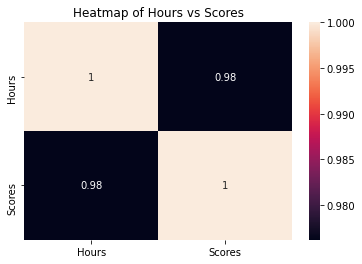

In [60]:
#2. Correlation plot(Heat map)

sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of Hours vs Scores")
plt.show()

**Both lmplot and heatmap shows that target(Scores) and independent(Hours) are strongly related with a correlation of 0.98.
That means, there is a linear relationship between the target and the independent variable.**

## Summary of the EDA(Understanding data)

1. The dataset has records of 25 students and their scores correspondong to their number of study hours.
2. The target variable is a number and continous in nature. The first assumption of the Linear regression is satified.
3. There is no mistake in the datatype of the variables when compared to the probelm statement.
4. The student who has studied for the highest number of hours(9.2hrs) is not the topper(88 score).
5. The student who has studied for the least number of hours(1.1hrs) is the one with the lowest score(17).
6. The student with the highest marks of 95 has put in 8.9 hours of study time which is 0.3 hours less than the student who has put in the highest number of study hours(9.2 hours).
7. There are no missing values of any kind(standard/non-standard) or duplicate records in the given dataset.
8. Both the variables are normally distributed and their skew values are closer to 0.
9. There are no outliers in any of the variables.
10. From the lmplot and heatmap,there is a linear relationship between the target and the independent variable.

## 2. Building a Simple Linear Regression Model

In [76]:
# Defining the target as y and independent variable as X

X=df.drop("Scores",axis=1)
y=df["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [77]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Train-Test Split

In [157]:
# Import train_test_split function from sci-kit learn
# Split in the ratio train:test=0.7:0.3

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

### Linear Regression model from sci-kit learn


In [158]:
# Import LinearRegression modelfrom sci-kit learn
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression object
lr=LinearRegression()

# Fit the model on the train data
lr_fit=lr.fit(X_train,y_train)

# Prediction for train and test
pred_train=lr_fit.predict(X_train)
pred_test=lr_fit.predict(X_test)

## 3. Model Performance Evaluation

In [159]:
# Checking r2_score

r2_score=lr_fit.score(X_train,y_train)
print("The R-Squared value: ",round(r2_score,3))

The R-Squared value:  0.962


**The r-squared value is 0.96. <br>
This means that the the target variable is able explain 96% of the variance due to the independent variable.**

In [176]:
# importing all the metrics in sklearn

from sklearn.metrics import *

In [177]:
# Let us define a function to track the evaluation metrics for both test and the train data.

model_perfomance_score=pd.DataFrame(columns=["Train/Test","MAPE","RMSE","MAE"])
def model_perfomance_score_update(name,actual,predicted):
    global model_perfomance_score
    model_perfomance_score=model_perfomance_score.append({"Train/Test":name,
                                                          "MAPE":round(mean_absolute_percentage_error(actual,predicted),2),
                                                          "RMSE":round(np.sqrt(mean_squared_error(actual,predicted)),2),
                                                          "MAE":round(mean_absolute_error(actual,predicted),2)
                                                         },ignore_index=True)

In [178]:
# call the fucntion for both train and test

model_perfomance_score_update("Train",y_train,pred_train)
model_perfomance_score_update("Test",y_test,pred_test)
model_perfomance_score=model_perfomance_score.set_index("Train/Test")
model_perfomance_score

,MAPE,RMSE,MAE
Train/Test,,,
Train,0.11,4.89,4.44
Test,0.13,6.62,5.86


**Model is slightly overfitted on the Train data as the error on the train data is less than that of the test data.
But still the degree is overfitting is not  too high. It is acceptable.**

### Residual distribution Check

In [182]:
# Let us now check the residual distribution

residual= y_test-pred_test
residual

22    -5.505500
21     3.537507
0     -6.561409
3    -12.303367
12    -6.475395
10     5.662227
6     -6.273263
11     0.584815
Name: Scores, dtype: float64

In [183]:
# Importing qqplot to plot residual distribution

from statsmodels.graphics.gofplots import qqplot

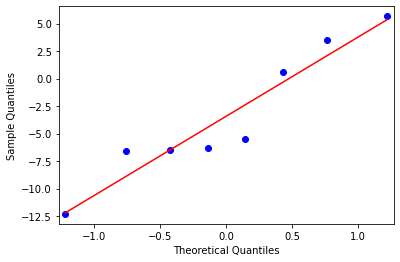

In [186]:
qqplot(residual,line="r")
plt.show()

Residual Skewness: 0.30288858393424045


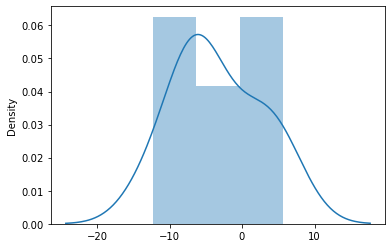

In [191]:
print("Residual Skewness:",residual.skew())
sns.distplot(x=residual)
plt.show()

**From the qqplot and the distplot we can say the residuals are normally distributed. This is an indication that our model's performance is GOOD.**

## 4. Predicting the score if a student studies for 9.25 hrs/ day?

In [211]:
hours_day=9.25
hours_day=np.array(hours_day).reshape(1, -1)
print("The predicted score if a student studies",hours_day[0][0],"hours in a day is:",round(lr_fit.predict(hours_day)[0],2))

The predicted score if a student studies 9.25 hours in a day is: 94.77
